In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from scipy.stats import gamma, norm, poisson

In [49]:
covid_cases = pd.read_csv('./data/covid_cases_weekly', index_col=0)
covid_deaths = pd.read_csv('./data/covid_deaths_weekly', index_col=0)

In [50]:
main_state = 'NY'
other_states = ['CA', 'TX', 'FL', 'PA', 'IL']

ny_cases = covid_cases[covid_cases['State'] == main_state]
ny_cases = ny_cases.drop(axis=0, labels=ny_cases.index[0])

# Normalize by population

In [51]:
ny_cases.loc[:, 'Cases per 100000'] = ny_cases.iloc[:, -1] / ny_cases['population'] * 100_000
ny_cases.head()

,countyFIPS,County Name,State,StateFIPS,population,2020-06-01 00:00:00,2020-06-08 00:00:00,2020-06-15 00:00:00,2020-06-22 00:00:00,2020-06-29 00:00:00,...,2020-11-09 00:00:00,2020-11-16 00:00:00,2020-11-23 00:00:00,2020-11-30 00:00:00,2020-12-07 00:00:00,2020-12-14 00:00:00,2020-12-21 00:00:00,2020-12-28 00:00:00,2021-01-03 00:00:00,Cases per 100000
1842,36001,Albany County,NY,36,305506,1882,1978,2022,2060,2099,...,4095,4572,5148,5816,6818,8050,9377,10880,12405,4060.476717
1843,36003,Allegany County,NY,36,46091,48,51,55,58,59,...,471,650,856,1042,1239,1403,1576,1748,1927,4180.859604
1844,36005,Bronx County,NY,36,1418207,45359,46052,46645,47092,47555,...,57234,58905,61316,63997,67754,71738,75969,80350,85646,6039.033794
1845,36007,Broome County,NY,36,190488,574,624,655,670,710,...,4032,4431,4927,5367,6003,6532,7083,7745,8601,4515.245055
1846,36009,Cattaraugus County,NY,36,76117,89,95,106,115,123,...,611,683,901,1135,1439,1783,2055,2337,2667,3503.816493


# Plot histogram of total cases vs. number of counties with that number of cases

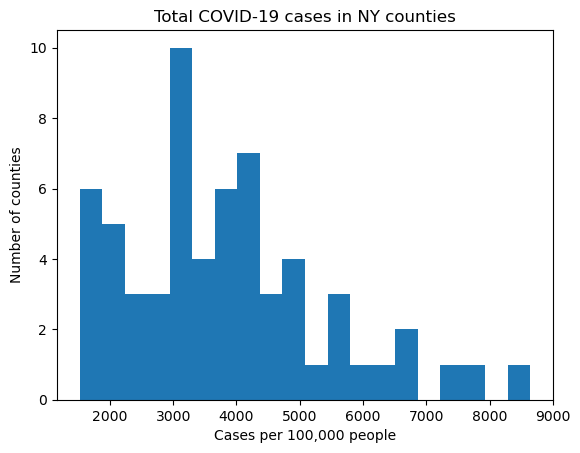

In [52]:
plt.hist(ny_cases['Cases per 100000'], bins=20)
plt.xlabel('Cases per 100,000 people')
plt.ylabel('Number of counties')
plt.title('Total COVID-19 cases in NY counties')
plt.show()

# Fit a gamma distribution to the data

In [53]:
ny_gamma_params = gamma.fit(ny_cases['Cases per 100000'])
print('Shape: {} Location: {} Scale: {}'.format(*ny_gamma_params))
print('Mean: {} Variance: {} Skew: {} Kurtosis: {}'.format(*gamma.stats(*ny_gamma_params, moments='mvsk')))

Shape: 2.3006388691129214 Location: 1249.8090575680676 Scale: 1125.8333855135256
Mean: 3839.945104425477 Variance: 2916061.634574097 Skew: 1.3185778293658799 Kurtosis: 2.6079712381428535


As seen above, the mean is around 3800, with a variance of 2.9e6. The skew is 1.3, and the kurtosis is 2.6. The skew and kurtosis are both positive, indicating that the distribution is right-skewed and has a heavier right tail than a normal distribution.

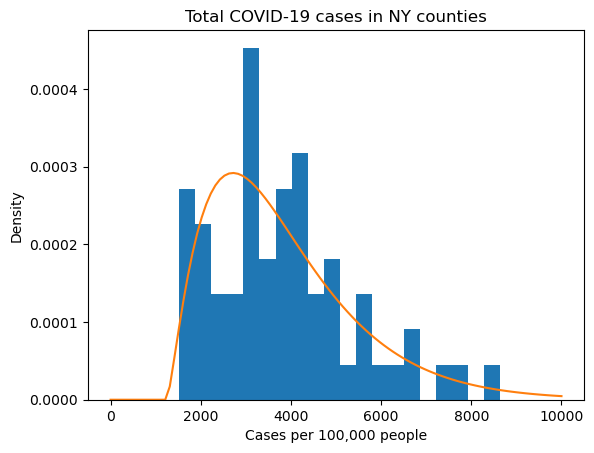

In [54]:
x = np.linspace(0, 10_000, 100)
y = gamma.pdf(x, *ny_gamma_params)
plt.hist(ny_cases['Cases per 100000'], bins=20, density=True)
plt.plot(x, y)
plt.xlabel('Cases per 100,000 people')
plt.ylabel('Density')
plt.title('Total COVID-19 cases in NY counties')
plt.show()

For state: CA
Mean: 5397.412556211866 Variance: 6851574.551842382 Skew: 1.0312627545315234 Kurtosis: 1.5952543033259177


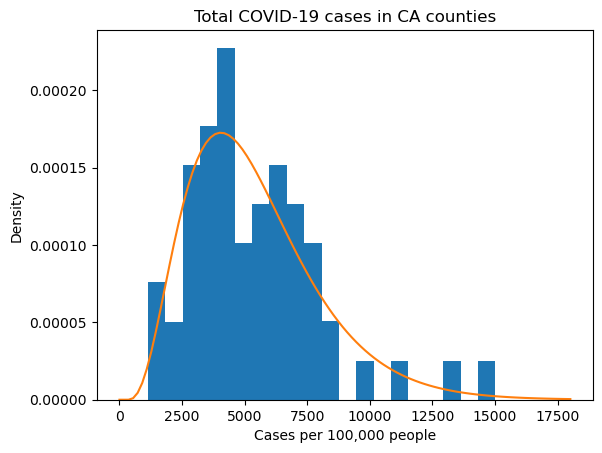

For state: TX
Mean: 6606.909854678448 Variance: 5862103.1145054 Skew: 0.17115845185266276 Kurtosis: 0.04394282346090043


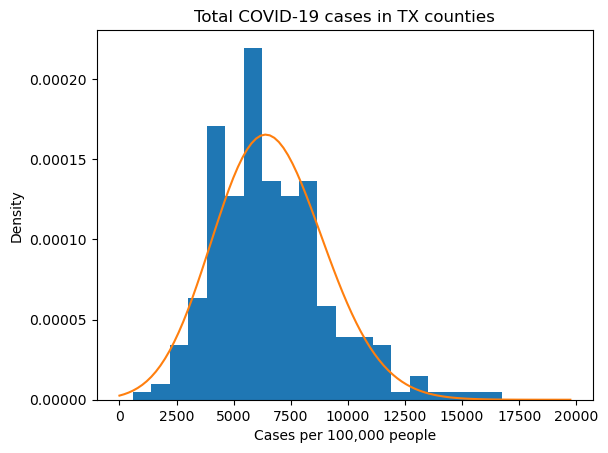

For state: FL
Mean: 6657.718275679187 Variance: 5164211.597225782 Skew: 1.3039126073544254 Kurtosis: 2.550282131426724


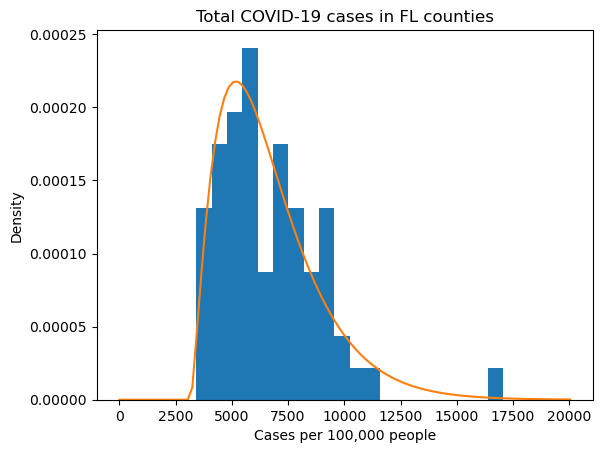

For state: PA
Mean: 5103.1880510554365 Variance: 1089667.8974415527 Skew: 0.10537877509881581 Kurtosis: 0.016657029361990205


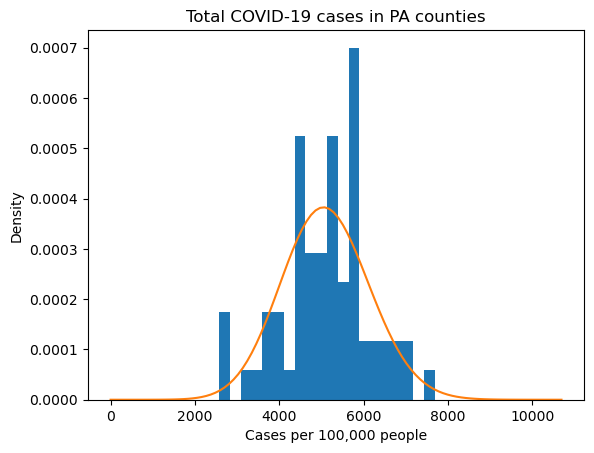

For state: IL
Mean: 8238.818112096851 Variance: 2407309.098331551 Skew: 0.5511107337458123 Kurtosis: 0.4555845612747716


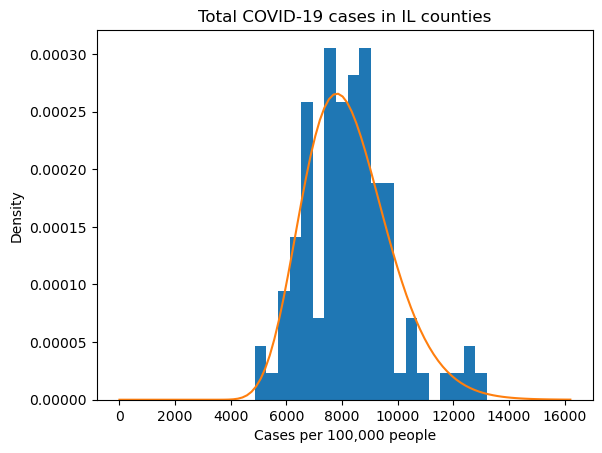

In [55]:
other_states_gamma_params = {}
for state in other_states:
    state_cases = covid_cases[covid_cases['State'] == state]
    state_cases = state_cases.drop(axis=0, labels=state_cases.index[0])
    state_cases.loc[:, 'Cases per 100000'] = state_cases.iloc[:, -1] / state_cases['population'] * 100_000
    state_gamma_params = gamma.fit(state_cases['Cases per 100000'])
    other_states_gamma_params[state] = state_gamma_params
    print(f'For state: {state}')
    print('Mean: {} Variance: {} Skew: {} Kurtosis: {}'.format(*gamma.stats(*state_gamma_params, moments='mvsk')))
    max_cases = state_cases['Cases per 100000'].max()
    x = np.linspace(0, max_cases + 3000, 100)
    y = gamma.pdf(x, *state_gamma_params)
    plt.hist(state_cases['Cases per 100000'], bins=20, density=True)
    plt.plot(x, y)
    plt.xlabel('Cases per 100,000 people')
    plt.ylabel('Density')
    plt.title('Total COVID-19 cases in {} counties'.format(state))
    plt.show()

# Comparing the gamma distributions of the states
All states have a right-skewed distribution, with positive skew and kurtosis. The state with the least skew and kurtosis is Philadelphia. New York has the highest skew, which implies that there are some counties with a very high number of cases. This makes sense, as New York City is in New York state, and it was one of the first places in the US to have a large outbreak of COVID-19.

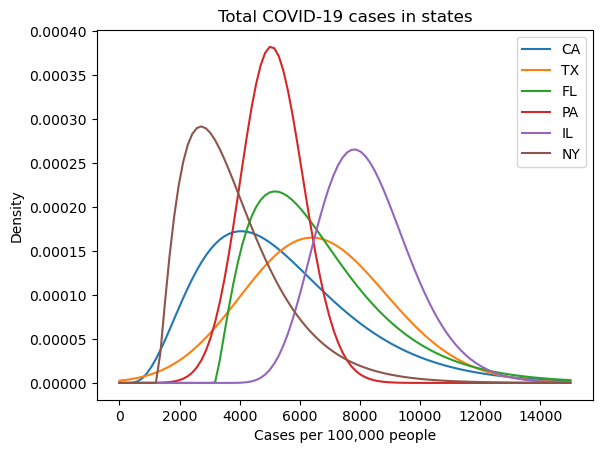

In [56]:
x = np.linspace(0, 15_000, 100)
for state, params in other_states_gamma_params.items():
    y = gamma.pdf(x, *params)
    plt.plot(x, y, label=state)
plt.plot(x, gamma.pdf(x, *ny_gamma_params), label=main_state)
plt.xlabel('Cases per 100,000 people')
plt.ylabel('Density')
plt.title('Total COVID-19 cases in states')
plt.legend()
plt.show()


The above plot shows the gamma distributions of the number of COVID-19 cases per 100,000 people in various states. Their shapes are quite different, with very different means and variances. This is likely due to the different responses to the pandemic in each state, as well as the different population densities and demographics of each state. States that exhibit more right-skew have a higher proportion of counties with a very high number of cases, while states with less right-skew have a more even distribution of cases across counties. This corresponds to states with very dense population centers, such as New York and California, having a few counties with a very high number of cases. States with more rural populations, such as Texas, have a more even distribution of cases across counties.

# Poisson distribution for each state

For state: NY
Cases:
Mean: 3839.945155658161 Variance: 3839.945155658161 Skew: 0.016137545850895652 Kurtosis: 0.00026042038608975953


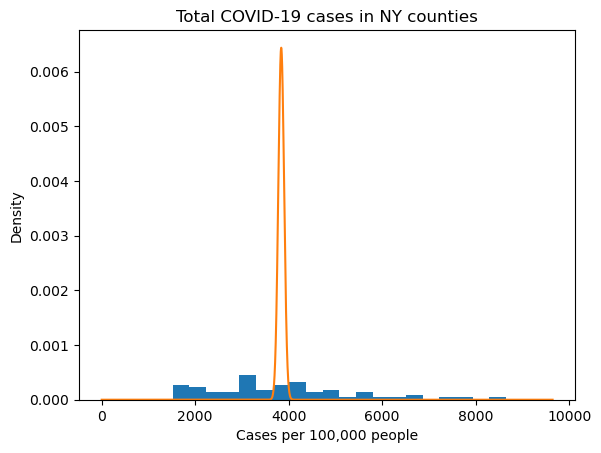

Deaths:
Mean: 92.35286489601395 Variance: 92.35286489601395 Skew: 0.1040578417098066 Kurtosis: 0.010828034421303166


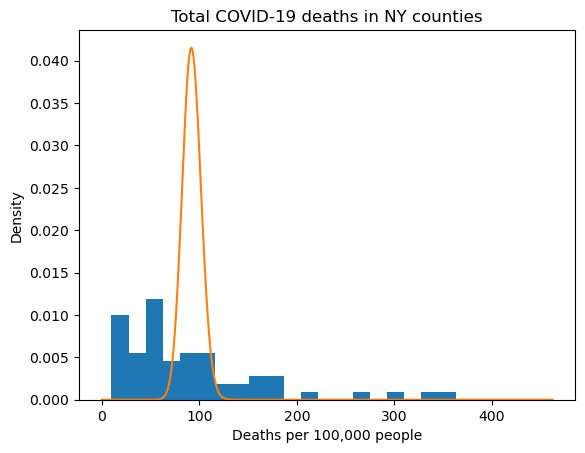

For state: CA
Cases:
Mean: 5397.413310382381 Variance: 5397.413310382381 Skew: 0.013611536815311413 Kurtosis: 0.00018527393447457795


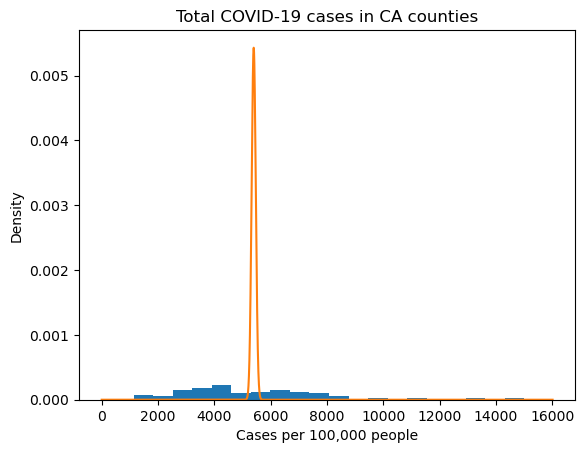

Deaths:
Mean: 60.0253217431402 Variance: 60.0253217431402 Skew: 0.12907221163500227 Kurtosis: 0.016659635816350816


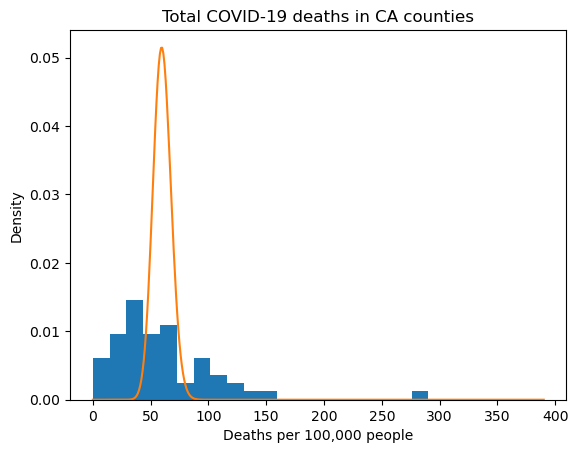

For state: TX
Cases:
Mean: 6649.904631415665 Variance: 6649.904631415665 Skew: 0.012262874721819248 Kurtosis: 0.0001503780964430335


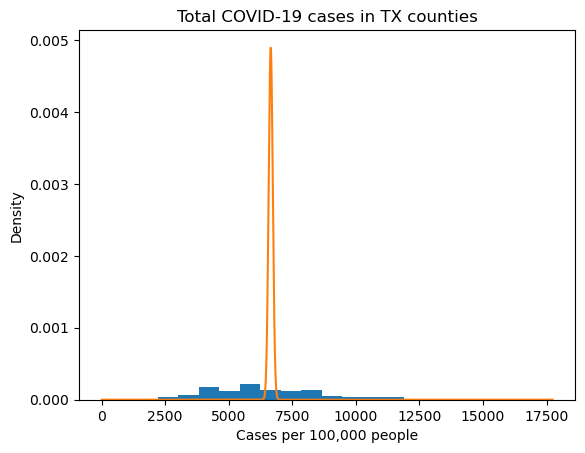

Deaths:
Mean: 178.7429263054997 Variance: 178.7429263054997 Skew: 0.0747972391952335 Kurtosis: 0.005594626991228974


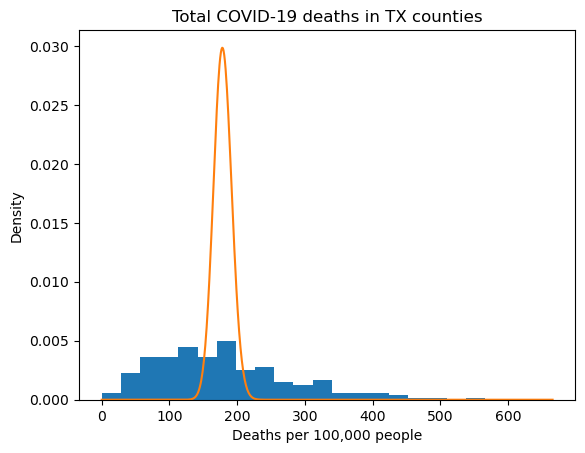

For state: FL
Cases:
Mean: 6657.376446081317 Variance: 6657.376446081317 Skew: 0.012255991255701407 Kurtosis: 0.00015020932165982933


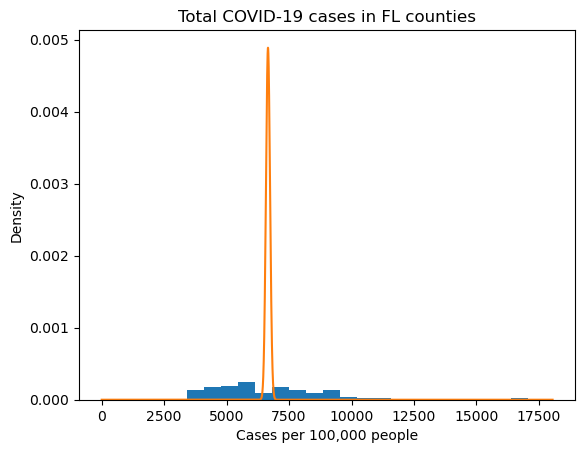

Deaths:
Mean: 116.34009527549367 Variance: 116.34009527549367 Skew: 0.09271185965628218 Kurtosis: 0.008595488920926162


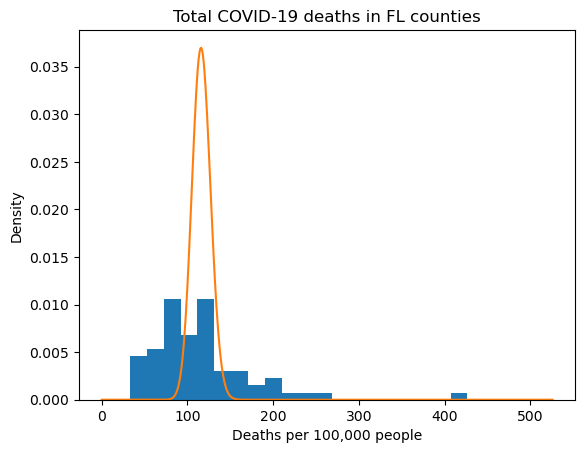

For state: PA
Cases:
Mean: 5104.368816406193 Variance: 5104.368816406193 Skew: 0.013996807076518705 Kurtosis: 0.00019591060833728407


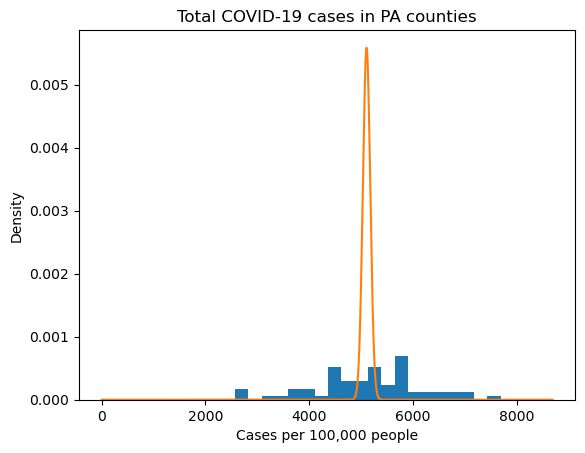

Deaths:
Mean: 118.14288137957308 Variance: 118.14288137957308 Skew: 0.09200177804369537 Kurtosis: 0.008464327163201389


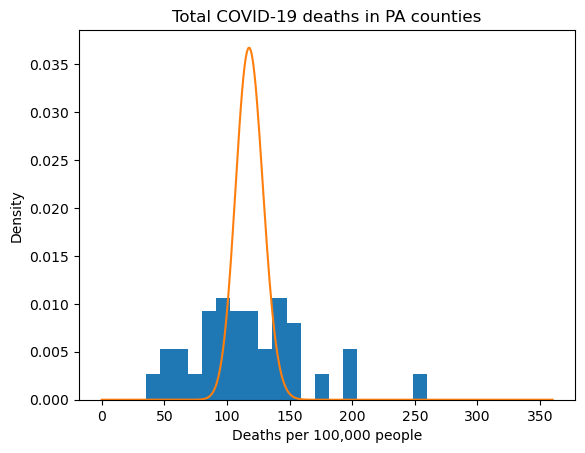

For state: IL
Cases:
Mean: 8238.81810635144 Variance: 8238.81810635144 Skew: 0.01101710637145371 Kurtosis: 0.00012137663279992594


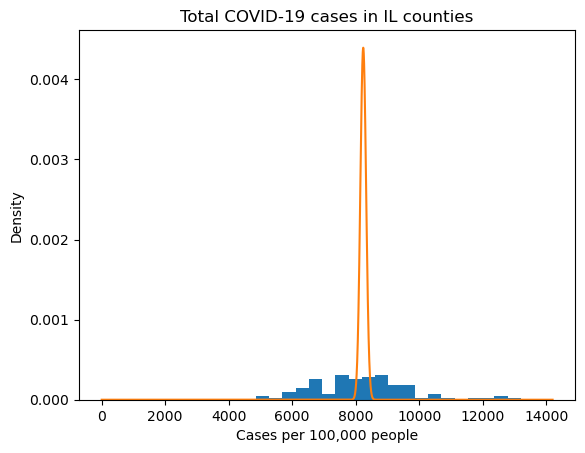

Deaths:
Mean: 162.5103311901515 Variance: 162.5103311901515 Skew: 0.07844396049653017 Kurtosis: 0.006153454938381187


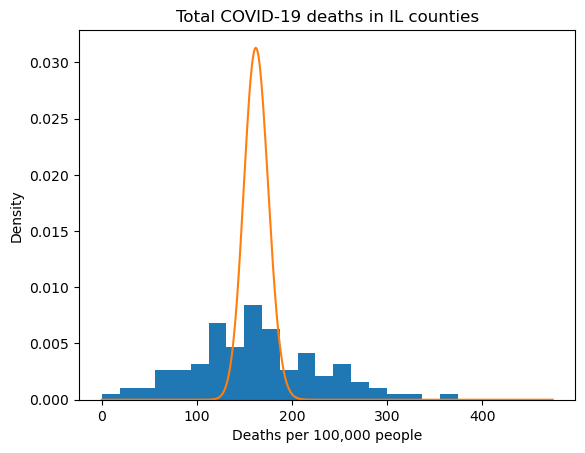

In [68]:
states = [main_state] + other_states
state_case_mus = {}
state_death_mus = {}
for state in states:
    # get case data for state
    state_cases = covid_cases[covid_cases['State'] == state]
    state_cases = state_cases.drop(axis=0, labels=state_cases.index[0])
    state_cases.loc[:, 'Cases per 100000'] = state_cases.iloc[:, -1] / state_cases['population'] * 100_000
    
    # get death data for state
    state_deaths = covid_deaths[covid_deaths['State'] == state]
    state_deaths = state_deaths.drop(axis=0, labels=state_deaths.index[0])
    state_deaths.loc[:, 'Deaths per 100000'] = state_deaths.iloc[:, -1] / state_deaths['population'] * 100_000
    
    # calculate mus for Poisson distributions
    state_case_mu = state_cases['Cases per 100000'].mean()
    state_case_mus[state] = state_case_mu
    state_death_mu = state_deaths['Deaths per 100000'].mean()
    state_death_mus[state] = state_death_mu
    
    # fit Poisson distribution to cases
    print(f'For state: {state}')
    print('Cases:')
    print('Mean: {} Variance: {} Skew: {} Kurtosis: {}'.format(*poisson.stats(state_case_mu, moments='mvsk')))
    max_cases = state_cases['Cases per 100000'].max()
    x = np.arange(0, max_cases + 1000)
    y = poisson.pmf(x, state_case_mu)
    plt.hist(state_cases['Cases per 100000'], bins=20, density=True)
    plt.plot(x, y)
    plt.xlabel('Cases per 100,000 people')
    plt.ylabel('Density')
    plt.title(f'Total COVID-19 cases in {state} counties')
    plt.show()
    
    # fit Poisson distribution to deaths
    print('Deaths:')
    print('Mean: {} Variance: {} Skew: {} Kurtosis: {}'.format(*poisson.stats(state_death_mu, moments='mvsk')))
    max_deaths = state_deaths['Deaths per 100000'].max()
    x = np.arange(0, max_deaths + 100)
    y = poisson.pmf(x, state_death_mu)
    plt.hist(state_deaths['Deaths per 100000'], bins=20, density=True)
    plt.plot(x, y)
    plt.xlabel('Deaths per 100,000 people')
    plt.ylabel('Density')
    plt.title(f'Total COVID-19 deaths in {state} counties')
    plt.show()

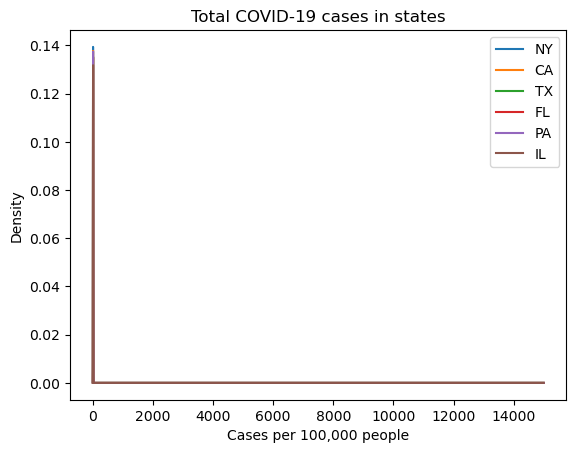

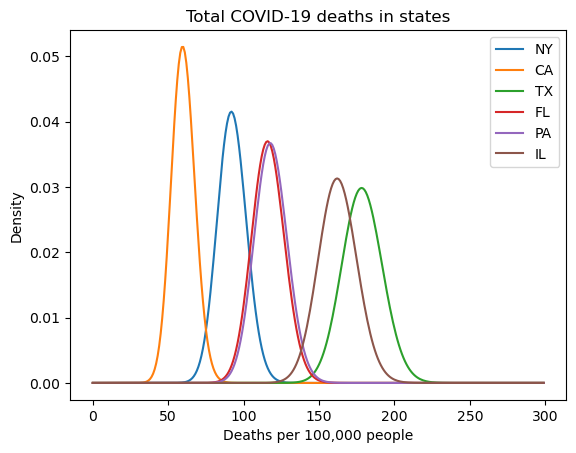

In [58]:
# Comparing the Poisson distributions of the states on the same plot
x = np.arange(0, 15_000)
for state, mu in state_case_mus.items():
    y = poisson.pmf(x, mu)
    plt.plot(x, y, label=state)
plt.xlabel('Cases per 100,000 people')
plt.ylabel('Density')
plt.title('Total COVID-19 cases in states')
plt.legend()
plt.show()

x = np.arange(0, 300)
for state, mu in state_death_mus.items():
    y = poisson.pmf(x, mu)
    plt.plot(x, y, label=state)
plt.xlabel('Deaths per 100,000 people')
plt.ylabel('Density')
plt.title('Total COVID-19 deaths in states')
plt.legend()
plt.show()

I feel that the poisson modeling is less accurate than the previous gamma modeling. The poisson distribution is discrete, while the gamma distribution is continuous. The gamma distribution is a better fit for the data because the number of COVID-19 cases and deaths per 100000 people is continuous. Also, the poisson distributions have much less skew/kurtosis than the gamma distributions. This is likely because the poisson distribution is not as flexible as the gamma distribution, and cannot capture the right-skew of the data as well. This loses the information about the distribution of cases and deaths across counties, which is important for understanding the spread of COVID-19 in each state.

# Correlation with presidential election dataset variables

In [59]:
covid_and_election_raw = pd.read_csv('./data/covid_and_pres_county.csv')
# drop columns with suffix  _deaths
covid_and_election = covid_and_election_raw.loc[:, ~covid_and_election_raw.columns.str.endswith('_deaths')]
# drop first column
covid_and_election = covid_and_election.drop(axis=1, columns='Unnamed: 0')
covid_and_election_ny = covid_and_election[covid_and_election['StateAbbr'] == 'NY']
# keep first 10 columns and last column
covid_and_election_ny_cases = covid_and_election_ny.iloc[:, np.r_[0:10, -1]]
covid_and_election_ny_cases.rename(columns={'2020-12-31_cases': 'cases'}, inplace=True)
covid_and_election_ny_cases.head()


C:\Users\Redux\AppData\Local\Temp\ipykernel_10956\183518968.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_and_election_ny_cases.rename(columns={'2020-12-31_cases': 'cases'}, inplace=True)


,countyFIPS,County,state,StateAbbr,StateFIPS,population,candidate,party,total_votes,won,cases
12561,36001,Albany County,New York,NY,36,305506,Joe Biden,DEM,99474,True,11585
12562,36001,Albany County,New York,NY,36,305506,Donald Trump,REP,51081,False,11585
12563,36001,Albany County,New York,NY,36,305506,Jo Jorgensen,LIB,1523,False,11585
12564,36001,Albany County,New York,NY,36,305506,Howie Hawkins,GRN,779,False,11585
12565,36001,Albany County,New York,NY,36,305506,Brock Pierce,IND,595,False,11585


## Does the number of votes for the Democratic candidate correlate with the number of COVID-19 cases per 100,000 people?
1. Only keep rows where party == 'DEM'
2. Calculate the proportion of votes for the Democratic candidate based on county population
3. Calculate the correlation between the proportion of votes for the Democratic candidate and the number of COVID-19 cases per 100,000 people (at the end of 2020)

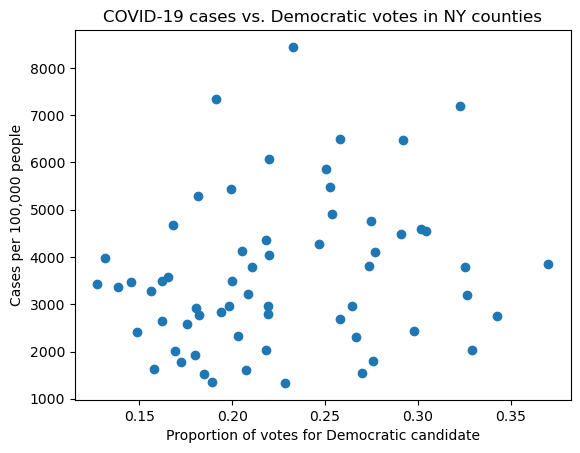

Correlation coefficient: 0.2055671639307375


In [60]:
dem_votes = covid_and_election_ny_cases[covid_and_election_ny_cases['party'] == 'DEM'].copy()
dem_votes.loc[:, 'Proportion of votes'] = dem_votes['total_votes'] / dem_votes['population']
dem_votes.loc[:, 'Cases per 100000'] = dem_votes['cases'] / dem_votes['population'] * 100_000

# Graph the relationship
plt.scatter(dem_votes['Proportion of votes'], dem_votes['Cases per 100000'])
plt.xlabel('Proportion of votes for Democratic candidate')
plt.ylabel('Cases per 100,000 people')
plt.title('COVID-19 cases vs. Democratic votes in NY counties')
plt.show()

# Calculate the correlation
corr_coefficient = dem_votes['Proportion of votes'].corr(dem_votes['Cases per 100000'])
print('Correlation coefficient:', corr_coefficient)

# Does higher voter turnout correlate with the number of COVID-19 cases per 100,000 people?
1. Total all votes across all parties for each county
2. Calculate voter turnout as the total votes divided by the population
3. Calculate the correlation between the proportion of votes and the number of COVID-19 cases per 100,000 people (at the end of 2020)

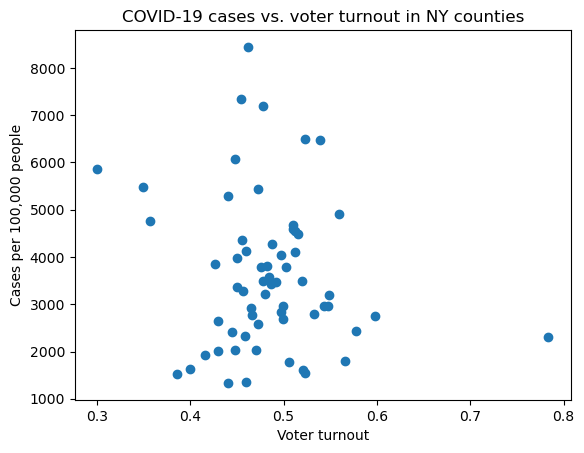

Correlation coefficient: -0.14355114262267593


In [61]:
total_votes = covid_and_election_ny_cases.groupby('countyFIPS')['total_votes'].sum()
total_votes = total_votes.reset_index()
total_votes['turnout'] = total_votes['total_votes'] / covid_and_election_ny_cases['population'].unique()
total_votes['cases per 100000'] = covid_and_election_ny_cases['cases'].unique() / covid_and_election_ny_cases['population'].unique() * 100_000

# Graph the relationship
plt.scatter(total_votes['turnout'], total_votes['cases per 100000'])
plt.xlabel('Voter turnout')
plt.ylabel('Cases per 100,000 people')
plt.title('COVID-19 cases vs. voter turnout in NY counties')
plt.show()

# Calculate the correlation
corr_coefficient = total_votes['turnout'].corr(total_votes['cases per 100000'])
print('Correlation coefficient:', corr_coefficient)

# Does the number of votes for the Republican candidate correlate with the number of COVID-19 cases per 100,000 people?
1. Only keep rows where party == 'REP'
2. Calculate the proportion of votes for the Republican candidate based on county population
3. Calculate the correlation between the proportion of votes for the Republican candidate and the number of COVID-19 cases per 100,000 people (at the end of 2020)

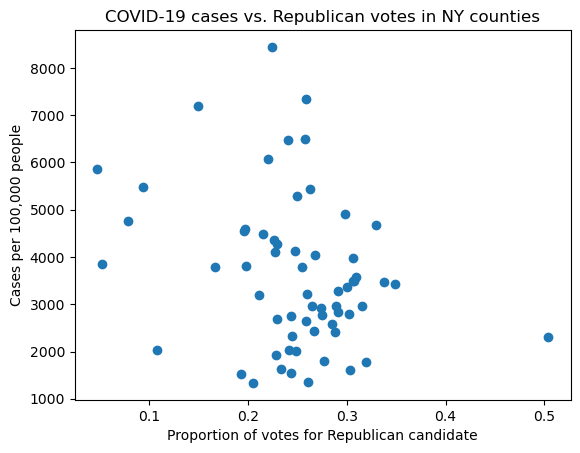

Correlation coefficient: -0.27494600128364977


In [62]:
rep_votes = covid_and_election_ny_cases[covid_and_election_ny_cases['party'] == 'REP'].copy()
rep_votes.loc[:, 'Proportion of votes'] = rep_votes['total_votes'] / rep_votes['population']
rep_votes.loc[:, 'Cases per 100000'] = rep_votes['cases'] / rep_votes['population'] * 100_000

# Graph the relationship
plt.scatter(rep_votes['Proportion of votes'], rep_votes['Cases per 100000'])
plt.xlabel('Proportion of votes for Republican candidate')
plt.ylabel('Cases per 100,000 people')
plt.title('COVID-19 cases vs. Republican votes in NY counties')
plt.show()

# Calculate the correlation
corr_coefficient = rep_votes['Proportion of votes'].corr(rep_votes['Cases per 100000'])
print('Correlation coefficient:', corr_coefficient)

Overall, I found very little correlation between any of the variables in the presidential election dataset and the number of COVID-19 cases per 100,000 people in NY counties. The correlation coefficients were all very close to 0, indicating that there is no linear relationship between these variables. This is likely because the number of COVID-19 cases is influenced by many factors, such as population density, public health measures, and individual behavior. I expected to see a positive correlation between voter turnout and COVID-19 cases, as higher voter turnout could indicate more people gathering in public places and spreading the virus. Also, I expected counties which voted for the Republican candidate to have more COVID-19 cases, as the Republican party has been less supportive of public health measures such as mask mandates and lockdowns. However, these relationships were not present in the data.